## 4.9 Intro to visualizations

In [1]:
#importing libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [3]:
#Establishing a path
path = r'C:\Users\danac\Downloads\Instacart Basket Analysis'


In [5]:
#Importing last dataframe from 4.8 exercise
df = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'orders_products_aggregated.pkl'))

### Bar Chart: 'orders day of week'

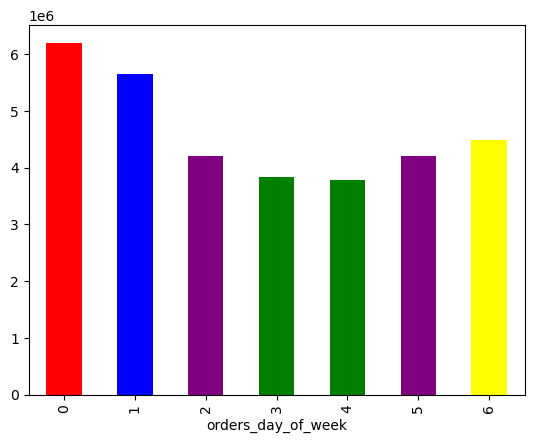

In [9]:
#Creating the bar chart in the 'bar' object, sorted by index, and added colours to column.
bar = df['orders_day_of_week'].value_counts().sort_index().plot.bar(color =['red','blue','purple','green','green','purple','yellow'])

In [11]:
#Saving the chart
bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_orders_byday.png'))

### Histogram & Scatterplot

<Axes: ylabel='Frequency'>

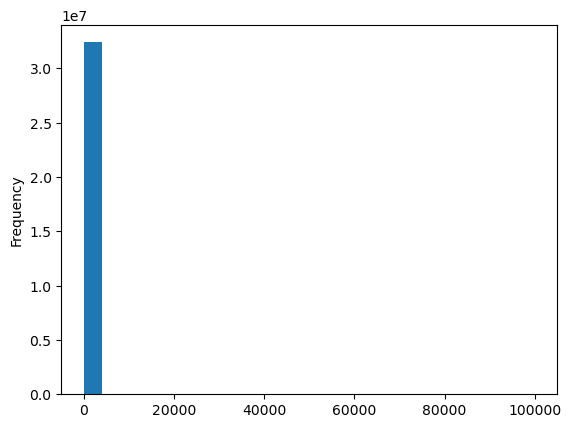

In [14]:
#Creating  the histogram
df['prices'].plot.hist(bins = 25)

In [16]:
#Describing the 'prices' column
df['prices'].describe()

count    3.240486e+07
mean     1.198023e+01
std      4.956554e+02
min      1.000000e+00
25%      4.200000e+00
50%      7.400000e+00
75%      1.130000e+01
max      9.999900e+04
Name: prices, dtype: float64

<Axes: xlabel='prices', ylabel='prices'>

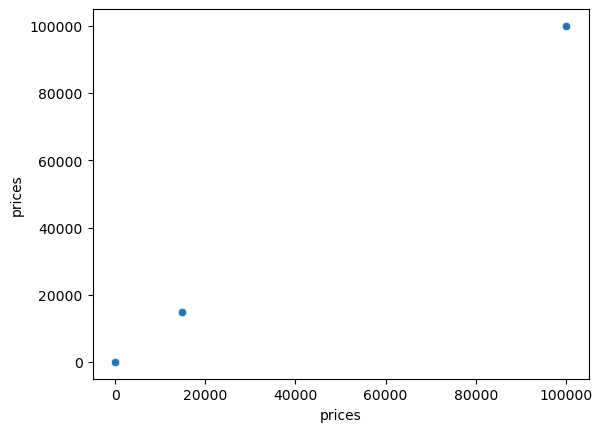

In [21]:
#Creating scatterplot
sns.scatterplot(x = 'prices', y = 'prices',data = df)

In [23]:
#Finding prices over $100
df.loc[df['prices'] > 100]

,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,...,price_range_loc,busiest_day,busiests_day,Busiest_period_of_day,max_order,loyalty_flag,average_spend,spender_flag,Customer_frequency,frequency_flag
13100147,21553,Lowfat 2% Milkfat Cottage Cheese,108,16,14900.0,912404,17,12,2,14,...,High-range product,Regularly busy,Regularly busy,Average Orders,40,Regular customer,108.648299,High_spender,5.0,Frequent Customer
13100148,21553,Lowfat 2% Milkfat Cottage Cheese,108,16,14900.0,603376,17,22,6,16,...,High-range product,Regularly busy,Regularly busy,Average Orders,40,Regular customer,108.648299,High_spender,5.0,Frequent Customer
13100149,21553,Lowfat 2% Milkfat Cottage Cheese,108,16,14900.0,3264360,135,2,2,21,...,High-range product,Regularly busy,Regularly busy,Average Orders,4,New customer,1154.792308,High_spender,12.0,Regular customer
13100150,21553,Lowfat 2% Milkfat Cottage Cheese,108,16,14900.0,892534,135,3,0,8,...,High-range product,Busiest day,Busiests day,Average Orders,4,New customer,1154.792308,High_spender,12.0,Regular customer
13100151,21553,Lowfat 2% Milkfat Cottage Cheese,108,16,14900.0,229704,342,8,1,19,...,High-range product,Regularly busy,Busiests day,Average Orders,16,Regular customer,114.426619,High_spender,23.0,Non_frequent_customer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21786876,33664,2 % Reduced Fat Milk,84,16,99999.0,2249946,204099,29,0,8,...,High-range product,Busiest day,Busiests day,Average Orders,39,Regular customer,1106.743956,High_spender,4.0,Frequent Customer
21786877,33664,2 % Reduced Fat Milk,84,16,99999.0,2363282,204099,31,0,9,...,High-range product,Busiest day,Busiests day,Average Orders,39,Regular customer,1106.743956,High_spender,4.0,Frequent Customer
21786878,33664,2 % Reduced Fat Milk,84,16,99999.0,3181945,204395,13,3,15,...,High-range product,Regularly busy,Leasts busy,Average Orders,15,Regular customer,451.153540,High_spender,5.0,Frequent Customer
21786879,33664,2 % Reduced Fat Milk,84,16,99999.0,2486215,205227,7,3,20,...,High-range product,Regularly busy,Leasts busy,Average Orders,12,Regular customer,1178.381871,High_spender,12.0,Regular customer


In [25]:
#Assigning null values to outliers
df.loc[df['prices'] >100, 'prices'] = np.nan

In [27]:
#Finding max value in prices
df['prices'].max()

25.0

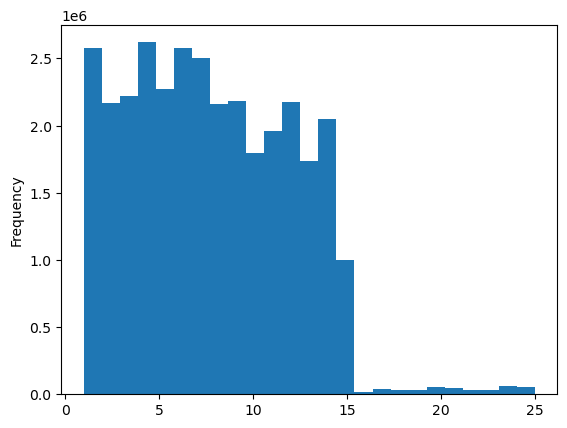

In [29]:
#Creating histogram for 'prices'
hist = df['prices'].plot.hist(bins = 25)

In [31]:
#Saving the histogram chart
hist.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'hist_prices.png'))

### Line chart from sample

In [34]:
#Creating the sample and setting the seed
np.random.seedb(4)

In [36]:
#assigning 'dev'
dev = np.random.rand(len(df)) <= 0.7

In [38]:
#split into 'big' and 'small'
big = df[dev]
small = df[~dev]

In [40]:
#checking results
len(df)

32404859

In [42]:
len(big) + len(small)

32404859

In [44]:
#Creating a dataframe using only the necessary columns
df_2 = small[['orders_day_of_week','prices']]

In [46]:
df_2.head()

,orders_day_of_week,prices
0,6,5.8
2,0,5.8
3,3,5.8
6,2,5.8
10,5,5.8


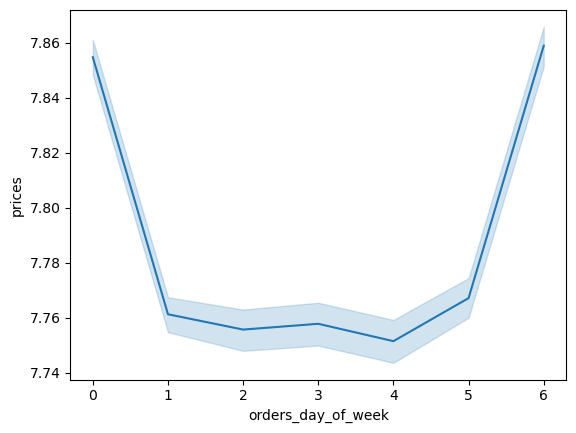

In [48]:
#Creating the  line chart
line = sns.lineplot(data = df_2, x = 'orders_day_of_week',y = 'prices')

In [50]:
#Saving the line chart
line.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'line_prices.png'))